In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import preprocessing, model_selection
import missingno as msno

In [6]:
# ## Import data stored in google Cloud 

# wvs_path = "gs://wvs-happiness-data/WVS_Time_Series_1981-2022_csv_v5_0.csv"
# df = pd.read_csv(wvs_path)
# print(df.head())


In [2]:
wvs_path = "C:/Users/PC/Desktop/data/WVS_Time_Series_1981-2022_csv_v5_0.csv"
df = pd.read_csv(wvs_path)
df.head()

,version,doi,S001,S002VS,S003,COUNTRY_ALPHA,COW_NUM,COW_ALPHA,S004,S006,...,Y023A,Y023B,Y023C,Y024A,Y024B,Y024C,survself,tradrat5,TradAgg,SurvSAgg
0,5-0-0 (2024-04-30),doi.org/10.14281/18241.25,2,3,8,ALB,339,ALB,1,1,...,0.000000,0.444444,0.444444,0.33,0.0,0.165,-1.011276,0.160847,0.158964,-1.792410
1,5-0-0 (2024-04-30),doi.org/10.14281/18241.25,2,3,8,ALB,339,ALB,1,2,...,0.111111,0.444444,0.444444,0.33,0.0,0.165,-0.688773,0.409283,0.558946,-1.208679
2,5-0-0 (2024-04-30),doi.org/10.14281/18241.25,2,3,8,ALB,339,ALB,1,3,...,0.000000,0.444444,0.444444,0.33,0.5,0.415,NaN,NaN,NaN,NaN
3,5-0-0 (2024-04-30),doi.org/10.14281/18241.25,2,3,8,ALB,339,ALB,1,4,...,0.000000,0.333333,0.333333,0.33,0.0,0.165,-1.319863,0.733956,1.081669,-2.350952
4,5-0-0 (2024-04-30),doi.org/10.14281/18241.25,2,3,8,ALB,339,ALB,1,5,...,0.000000,0.333333,0.333333,0.00,0.5,0.250,NaN,NaN,NaN,NaN


##

# Data Preprocessing

In [3]:
# representing missing data by nan istead of numerical values
missing_values = [-1, -2,-3, -4, -5]
df.replace(missing_values, np.nan, inplace=True)

In [4]:
# Drop meta data and composed columns
df=df.drop(columns = [col for col in df.columns if col.startswith('Y')] )

# Data Cleaning
> Preparing data is a continuous process rather than a one-time task. 

In [9]:
df.dtypes.unique()

array([dtype('O'), dtype('int64'), dtype('float64')], dtype=object)

### Handling Missing Data

In [5]:
# visualize Missing DATA 
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage = missing_percentage[missing_percentage > 0]  
missing_percentage = missing_percentage.sort_values(ascending=False)  

print(missing_percentage)

F186       99.916345
A124_31    99.905973
G007_13    99.894924
F187       99.891542
E216       99.845994
             ...    
A042        0.710729
A038        0.692240
A029        0.674877
A035        0.584683
A032        0.563939
Length: 990, dtype: float64


what is the pattern of missing data ?
how to handle missing data?
what columns/rows to drop , what columns/rows to keep ? 
how to impute the missing values ? 
 Why are these values missing?
Is missingness random or systematic?
Does missingness affect the target variable?
Will imputing missing data introduce bias?
Can missingness itself be a feature?
What is the best imputation method based on data distribution?
Do I need domain knowledge to understand why data is missing?

In [11]:
# Dataset after missing data handling 


# Data Transformation

# Feature Selection 

# Predicting happiness 

Predicting the features :
- A008 (Feeling of happiness) 
- A170 (Satisfaction with life) 


In [6]:
# determine the range of values
for col in ['A008','A170']:
   print(df[col].unique())

[ 3.  2.  1.  4. nan]
[ 3.  9.  4.  7.  5.  2.  8.  6.  1. nan 10.]


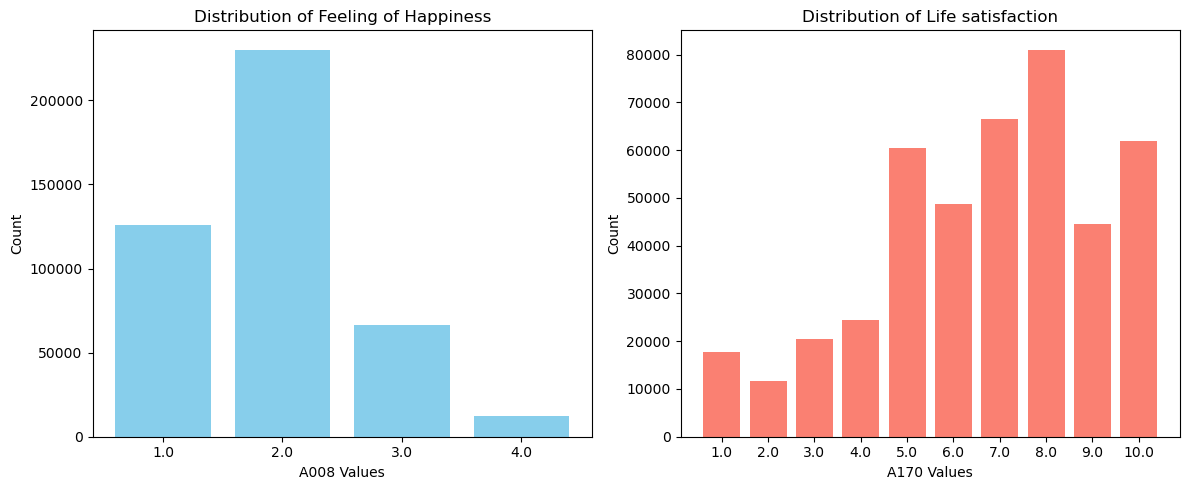

In [37]:

# Count the occurrences of each category/value and sort by index
counts_A008 = df['A008'].value_counts().sort_index()
counts_A170 = df['A170'].value_counts().sort_index()

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot bar chart for A008
axes[0].bar(counts_A008.index.astype(str), counts_A008.values, color='skyblue')
axes[0].set_title('Distribution of Feeling of Happiness')
axes[0].set_xlabel('A008 Values')
axes[0].set_ylabel('Count')

# Plot bar chart for A170
axes[1].bar(counts_A170.index.astype(str), counts_A170.values, color='salmon')
axes[1].set_title('Distribution of Life satisfaction')
axes[1].set_xlabel('A170 Values')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


### Ordinal Logistic Regression  (Proportional Odds Model)


##### first iteration

In [ ]:
selected_features = ['X047R_WVS','X047_WVS','A009','X007']

##### GENERAL interation

In [33]:
## cleaning the data 
# drop highly missing columns
df_cl = df.dropna(axis=1, thresh=int(0.3 * len(df)))
df_cl.shape

(443488, 326)

In [34]:
# drop highly missing rows
df_cl = df_cl.dropna(axis=0, thresh=int(0.25* df.shape[1]))
df_cl.shape

(111621, 326)

In [14]:
## Transforming the data 


In [15]:
## Building the model 
# from sklearn.model_selection import train_test_split
# import statsmodels.api as sm
# from statsmodels.miscmodels.ordinal_model import OrderedModel
# from sklearn.metrics import accuracy_score

# X=df.drop(columns=['A008'])
# y = df['A008']

# X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)

# model = OrderedModel(
#     y_train,  # Target variable (ordinal)
#     sm.add_constant(X_train),  # Features (with an intercept)
#     distr="logit"  # Proportional odds model (use 'probit' for an alternative)
# )
# result = model.fit(method='bfgs')

# y_pred = result.predict(sm.add_constant(X_test))

# # Convert probabilities to class labels (choose highest probability)
# y_pred_classes = np.argmax(y_pred, axis=1) + 1  # +1 because indexing starts at 0


# accuracy = accuracy_score(y_test, y_pred_classes)
# print(f'Accuracy: {accuracy:.4f}')

### Random Forest / Decision Tree

In [16]:
# XGboost 

In [17]:
# CatGboost 

In [18]:
# LightGboost

In [19]:
# Ordinal SVM 

In [20]:
# Neural Networks for Ordinal Data ( DeepLearning)

## Algorithm benchmarking

# Detailed analysis on income

# Statistical tests 

# Time series analysis (1981-2022)

# Sentiment Analysis on Open-Ended Responses (NLP)